<a href="https://colab.research.google.com/github/Siddu123421/Number_plate_detection/blob/main/Real_Time_number_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_russian_plate_number.xml

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
--2025-04-23 12:59:29--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml [following]
--2025-04-23 12:59:29--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving india-skoda-license-plate.jpg to india-skoda-license-plate.jpg


Detected Plate Number: 
State: State not recognized


Detected Plate Number: MH2002366
State: Maharashtra


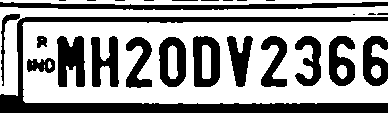

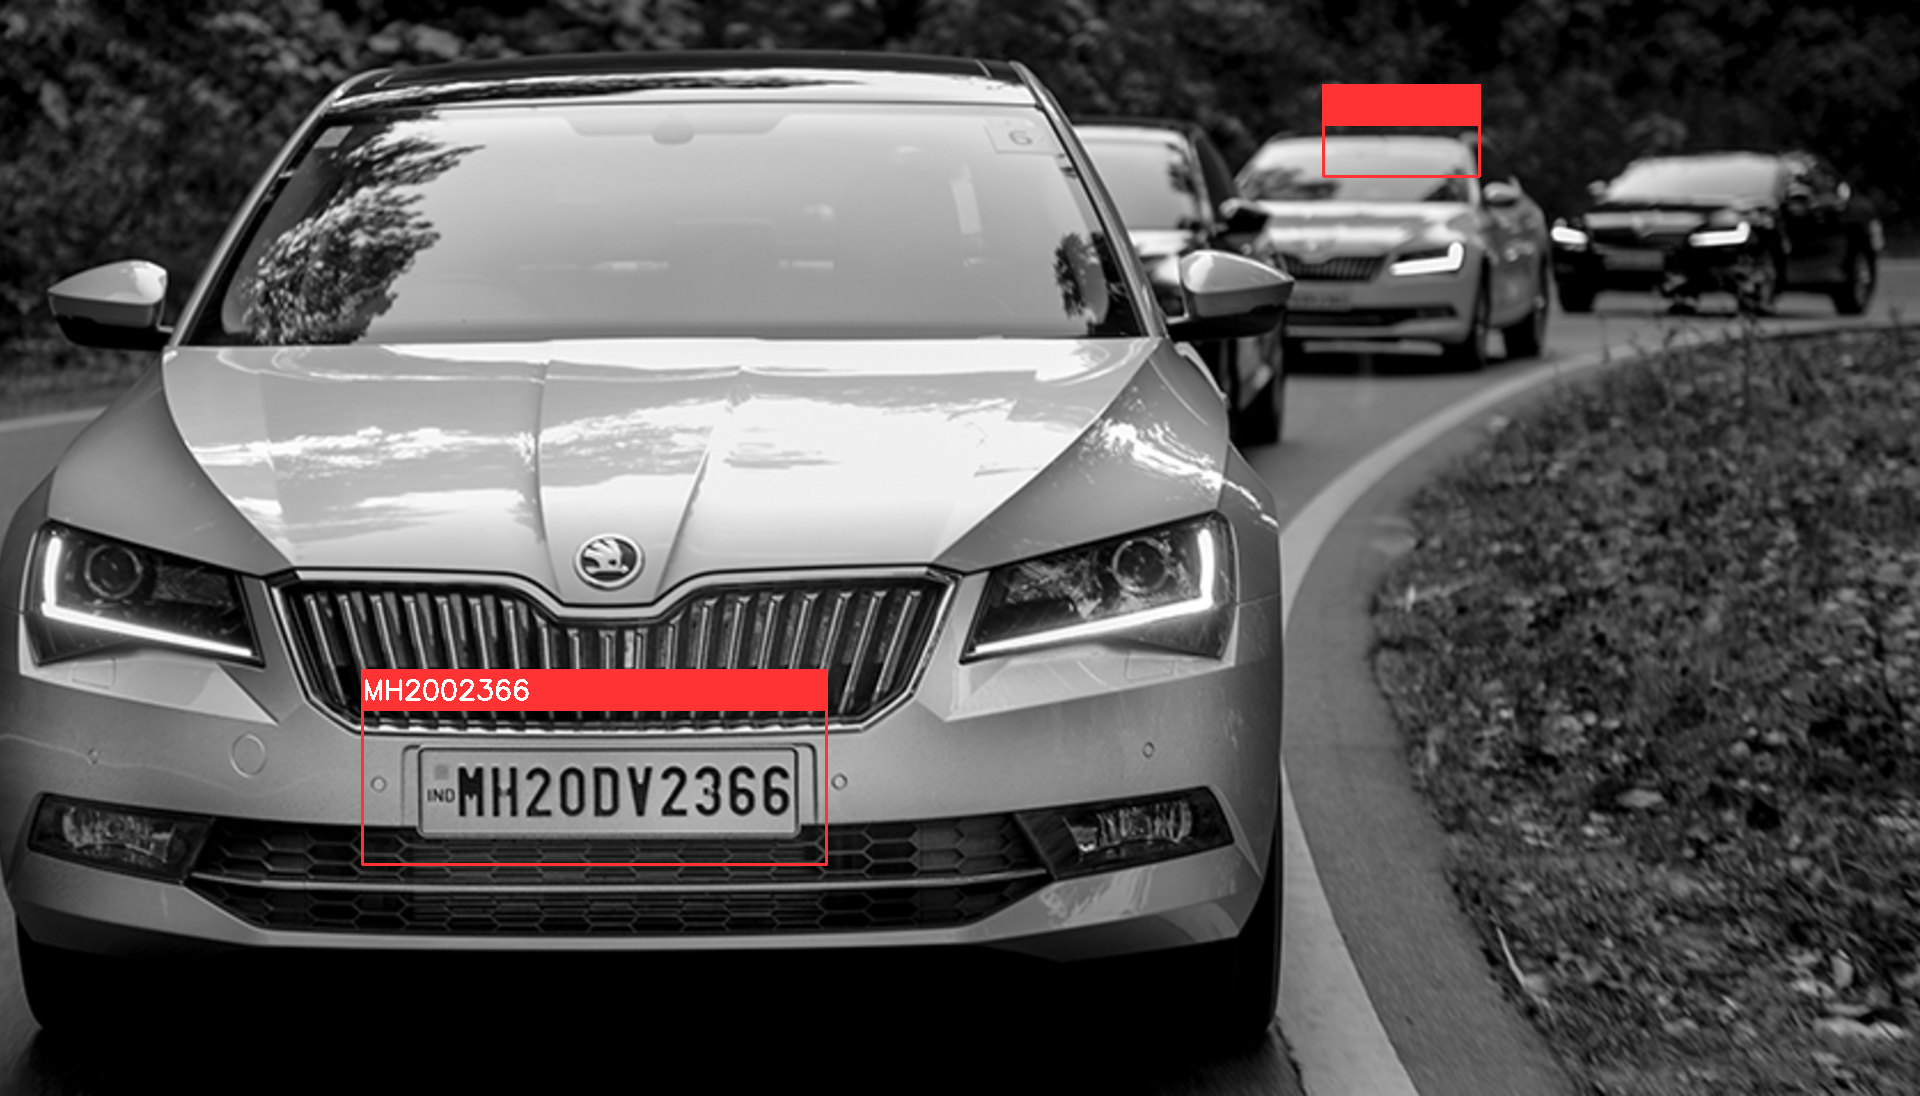

In [ ]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

states = {
    "AN": "Andaman and Nicobar", "AP": "Andhra Pradesh", "AR": "Arunachal Pradesh",
    "AS": "Assam", "BR": "Bihar", "CH": "Chandigarh", "DN": "Dadra and Nagar Haveli",
    "DD": "Daman and Diu", "DL": "Delhi", "GA": "Goa", "GJ": "Gujarat", "HR": "Haryana",
    "HP": "Himachal Pradesh", "JK": "Jammu and Kashmir", "KA": "Karnataka", "KL": "Kerala",
    "LD": "Lakshadweep", "MP": "Madhya Pradesh", "MH": "Maharashtra", "MN": "Manipur",
    "ML": "Meghalaya", "MZ": "Mizoram", "NL": "Nagaland", "OD": "Odisha", "PY": "Puducherry",
    "PB": "Punjab", "RJ": "Rajasthan", "SK": "Sikkim", "TN": "Tamil Nadu", "TR": "Tripura",
    "UP": "Uttar Pradesh", "WB": "West Bengal", "CG": "Chhattisgarh", "TS": "Telangana",
    "JH": "Jharkhand", "UK": "Uttarakhand"
}

def extract_num(img_filename):
    img = cv2.imread(img_filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    nplate = cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in nplate:
        wT, hT, cT = img.shape
        a, b = (int(0.02 * wT), int(0.02 * hT))
        plate = img[y + a:y + h - a, x + b:x + w - b, :]


        kernel = np.ones((1, 1), np.uint8)
        plate = cv2.dilate(plate, kernel, iterations=1)
        plate = cv2.erode(plate, kernel, iterations=1)

        plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        _, plate = cv2.threshold(plate_gray, 127, 255, cv2.THRESH_BINARY)


        read = pytesseract.image_to_string(plate, config='--psm 8')
        read = ''.join(e for e in read if e.isalnum())
        stat = read[0:2]


        cv2.rectangle(img, (x, y), (x + w, y + h), (51, 51, 255), 2)
        cv2.rectangle(img, (x - 1, y - 40), (x + w + 1, y), (51, 51, 255), -1)
        cv2.putText(img, read, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

        print("Detected Plate Number:", read)
        print("State:", states.get(stat, "State not recognized"))


        cv2_imshow(plate)


    cv2.imwrite("Result.png", img)
    cv2_imshow(img)

extract_num("india-skoda-license-plate.jpg")